<a href="https://colab.research.google.com/github/KKitamuraCCE/MyEgaroucid/blob/main/MyEgaroucid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Egaroucidのソース改変用なので無視してよい1

In [3]:
%%file /content/drive/MyDrive/MyIntern/console/print.hpp

/*
    Egaroucid Project

    @file print.hpp
        Functions about printing on console
    @date 2021-2023
    @author Takuto Yamana (a.k.a. Nyanyan)
    @license GPL-3.0 license
*/

#pragma once
#include <iostream>
#include <unordered_map>
#include "./../engine/engine_all.hpp"
#include "option.hpp"
#include "info.hpp"
#include "command_definition.hpp"
#include "commandline_option_definition.hpp"
#include "function.hpp"

#define COUT_TAB "  "
#define VERSION_TAB_SIZE 10
#define COMMANDLINE_OPTION_HELP_TAB_SIZE 40
#define COMMAND_HELP_TAB_SIZE 40
#define LEVEL_INFO_TAB_SIZE 5
#define LEVEL_MIDGAME_TAB_SIZE 15
#define LEVEL_DEPTH_TAB_SIZE 10
#define SEARCH_RESULT_TAB_SIZE 15
#define ANALYZE_TAB_SIZE 13
#define ANALYZE_SUMMARY_TAB_SIZE 13

struct Analyze_summary{
    int n_ply;
    int n_disagree;
    int sum_disagree;
    int n_mistake;
    int sum_mistake;

    Analyze_summary(){
        n_ply = 0;
        n_disagree = 0;
        sum_disagree = 0;
        n_mistake = 0;
        sum_mistake = 0;
    }
};

void print_version(){
    std::cout << EGAROUCID_NAME << " " << EGAROUCID_VERSION << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@date ";
    std::cout << EGAROUCID_DATE << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@author ";
    std::cout << EGAROUCID_AUTHOR << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@license ";
    std::cout << EGAROUCID_LICENSE << std::endl;
    std::cout << COUT_TAB << std::left << std::setw(VERSION_TAB_SIZE) << "@website ";
    std::cout << EGAROUCID_URL << std::endl;
    std::cout << std::endl;
}

void print_commandline_options_list(){
    std::cout << "Commandline options:" << std::endl;
    for (int i = 0; i < N_COMMANDLINE_OPTIONS; ++i){
        std::string s;
        for (int j = 0; j < (int)commandline_option_data[i].names.size(); ++j){
            if (j != 0)
                s += "|";
            s += commandline_option_data[i].names[j];
        }
        s += " " + commandline_option_data[i].arg;
        std::cout << COUT_TAB;
        std::cout << std::left << std::setw(COMMANDLINE_OPTION_HELP_TAB_SIZE) << s;
        std::cout << commandline_option_data[i].description;
        std::cout << std::endl;
    }
    std::cout << std::endl;
}

void print_commands_list(){
    std::cout << "Commands:" << std::endl;
    for (int i = 0; i < N_COMMANDS; ++i){
        std::string s;
        for (int j = 0; j < (int)command_data[i].names.size(); ++j){
            if (j != 0)
                s += "|";
            s += command_data[i].names[j];
        }
        s += " " + command_data[i].arg;
        std::cout << COUT_TAB;
        std::cout << std::left << std::setw(COMMAND_HELP_TAB_SIZE) << s;
        std::cout << command_data[i].description;
        std::cout << std::endl;
    }
    std::cout << std::endl;
}

void print_help(){
    print_version();
    print_commandline_options_list();
    print_commands_list();
}

void print_level_info(){
    const std::string probability_char = "_-=+^#";
    std::cout << "Level definition:" << std::endl;
    std::cout << COUT_TAB;
    std::cout << "Endgame probability" << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 78%: " << probability_char[MPC_78_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 81%: " << probability_char[MPC_81_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 95%: " << probability_char[MPC_95_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 98%: " << probability_char[MPC_98_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << " 99%: " << probability_char[MPC_99_LEVEL] << std::endl;
    std::cout << COUT_TAB << COUT_TAB << "100%: " << probability_char[MPC_100_LEVEL] << std::endl;
    std::cout << COUT_TAB;
    std::cout << "|";
    std::cout << std::right << std::setw(LEVEL_INFO_TAB_SIZE) << "Level";
    std::cout << "|";
    std::cout << std::left << std::setw(LEVEL_MIDGAME_TAB_SIZE) << "Midgame";
    std::cout << "|";
    std::string str_endgame_10 = "Endgame " + std::to_string(LEVEL_DEPTH_TAB_SIZE);
    std::cout << std::right << std::setw(LEVEL_DEPTH_TAB_SIZE) << str_endgame_10;
    std::cout << "|";
    for (int depth = LEVEL_DEPTH_TAB_SIZE * 2; depth <= 60; depth += LEVEL_DEPTH_TAB_SIZE){
        std::cout << std::right << std::setw(LEVEL_DEPTH_TAB_SIZE) << depth;
        std::cout << "|";
    }
    std::cout << std::endl;
    for (int level = 0; level < N_LEVEL; ++level){
        std::cout << COUT_TAB;
        std::cout << "|";
        std::cout << std::right << std::setw(LEVEL_INFO_TAB_SIZE) << level;
        std::cout << "|";
        std::string s;
        if (get_level_midsearch(level, 0))
            s = std::to_string(level_definition[level].mid_lookahead) + " moves@" + std::to_string(SELECTIVITY_PERCENTAGE[level_definition[level].mid_mpc_level]) + "%";
        else
            s = "None";
        std::cout << std::right << std::setw(LEVEL_MIDGAME_TAB_SIZE) << s;
        for (int n_moves = 0; n_moves < HW2 - 4; ++n_moves){
            if (n_moves % LEVEL_DEPTH_TAB_SIZE == 0)
                std::cout << "|";
            bool is_mid_search;
            uint_fast8_t mpc_level;
            int depth;
            get_level(level, n_moves, &is_mid_search, &depth, &mpc_level);
            if (is_mid_search)
                std::cout << " ";
            else{
                std::cout << probability_char[mpc_level];
            }
        }
        std::cout << "|";
        std::cout << std::endl;
    }
}

void print_board_info(Board_info *board){
    uint64_t black = board->board.player;
    uint64_t white = board->board.opponent;
    if (board->player == WHITE)
        std::swap(black, white);
    std::cout << "  ";
    for (int x = 0; x < HW; ++x)
        std::cout << (char)('a' + x) << " ";
    std::cout << std::endl;
    for (int y = 0; y < HW; ++y){
        std::cout << y + 1 << " ";
        for (int x = 0; x < HW; ++x){
            int cell = HW2_M1 - (y * HW + x);
            if (1 & (black >> cell))
                std::cout << "X ";
            else if (1 & (white >> cell))
                std::cout << "O ";
            else
                std::cout << ". ";
        }
        if (y == 2){
            std::cout << COUT_TAB;
            if (board->board.is_end())
                std::cout << "GAME OVER";
            else if (board->player == BLACK)
                std::cout << "BLACK to move";
            else
                std::cout << "WHITE to move";
        } else if (y == 3){
            std::cout << COUT_TAB;
            std::cout << "ply " << board->board.n_discs() - 3 << " " << HW2 - board->board.n_discs() << " empties";
        } else if (y == 4){
            std::cout << COUT_TAB;
            int black_discs, white_discs;
            black_discs = board->board.count_player();
            white_discs = board->board.count_opponent();
            if (board->player)
                std::swap(black_discs, white_discs);
            std::cout << "BLACK: " << black_discs << " WHITE: " << white_discs;
        }
        std::cout << std::endl;
    }
}

inline void print_search_result_body(Search_result result, int level){
    std::string s;
    if (result.depth == SEARCH_BOOK){
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << level;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Book";
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << idx_to_coord(result.policy);
        // std::cout << "|";
        std::cout << std::to_string(result.policy) << std::endl;
        if (result.value >= 0)
            s = "+" + std::to_string(result.value);
        else
            s = std::to_string(result.value);
        std::cout << s;
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // s = ms_to_time(0);
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << 0;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << 0;
        // std::cout << "|";
        std::cout << std::endl;
    } else{
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << level;
        // std::cout << "|";
        // s = std::to_string(result.depth) + "@" + std::to_string(result.probability) + "%";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << idx_to_coord(result.policy);
        // std::cout << "|";
        std::cout << std::to_string(result.policy) << std::endl;
        if (result.value >= 0)
            s = "+" + std::to_string(result.value);
        else
            s = std::to_string(result.value);
        std::cout << s;
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // s = ms_to_time(result.time);
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << s;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << result.nodes;
        // std::cout << "|";
        // std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << result.nps;
        // std::cout << "|";
        std::cout << std::endl;
    }
}

inline void print_search_result_head(){
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Level";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Depth";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Move";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Score";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Time";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "Nodes";
    std::cout << "|";
    std::cout << std::right << std::setw(SEARCH_RESULT_TAB_SIZE) << "NPS";
    std::cout << "|";
    std::cout << std::endl;
}

inline void print_search_result(Search_result result, int level){
    print_search_result_head();
    print_search_result_body(result, level);
}

void print_search_result_quiet(Search_result result){
    std::cout << idx_to_coord(result.policy) << std::endl;
}

inline void print_analyze_body(Analyze_result result, int ply, int player, std::string judge){
    std::string s;
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << ply;
    std::cout << "|";
    if (player == BLACK)
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Black";
    else
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "White";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << idx_to_coord(result.played_move);
    std::cout << "|";
    if (result.played_depth == SEARCH_BOOK)
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Book";
    else{
        s = std::to_string(result.played_depth) + "@" + std::to_string(result.played_probability) + "%";
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
    }
    std::cout << "|";
    if (result.played_score >= 0)
        s = "+" + std::to_string(result.played_score);
    else
        s = std::to_string(result.played_score);
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
    std::cout << "|";
    if (result.alt_move != -1){
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << idx_to_coord(result.alt_move);
        std::cout << "|";
        if (result.alt_depth == SEARCH_BOOK)
            std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Book";
        else{
            s = std::to_string(result.alt_depth) + "@" + std::to_string(result.alt_probability) + "%";
            std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
        }
        std::cout << "|";
        if (result.alt_score >= 0)
            s = "+" + std::to_string(result.alt_score);
        else
            s = std::to_string(result.alt_score);
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << s;
        std::cout << "|";
    } else{
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "None";
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "";
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "";
        std::cout << "|";
    }
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << judge;
    std::cout << "|";
    std::cout << std::endl;
}

inline void print_analyze_head(){
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Ply";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Player";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Played";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Depth";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Score";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Alternative";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Depth";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Score";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_TAB_SIZE) << "Judge";
    std::cout << "|";
    std::cout << std::endl;
}

inline void print_analyze_foot(Analyze_summary summary[]){
    std::cout << std::endl;
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Player";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Disagree";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Disagree Loss";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Disagree Rate";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Mistake";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Mistake Loss";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Mistake Rate";
    std::cout << "|";
    std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Avg. Error";
    std::cout << "|";
    std::cout << std::endl;
    std::string s;
    for (int i = 0; i < 2; ++i){
        std::cout << "|";
        if (i == BLACK)
            std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "Black";
        else
            std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << "White";
        std::cout << "|";
        std::stringstream ss_disagree;
        ss_disagree << std::right << std::setw(2) << summary[i].n_disagree;
        ss_disagree << " / ";
        ss_disagree << std::right << std::setw(2) << summary[i].n_ply;
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << ss_disagree.str();
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << summary[i].sum_disagree;
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << std::fixed << std::setprecision(3) << ((double)summary[i].n_disagree / summary[i].n_ply);
        std::cout << "|";
        std::stringstream ss_mistake;
        ss_mistake << std::right << std::setw(2) << summary[i].n_mistake;
        ss_mistake << " / ";
        ss_mistake << std::right << std::setw(2) << summary[i].n_ply;
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << ss_mistake.str();
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << summary[i].sum_mistake;
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << std::fixed << std::setprecision(3) << ((double)summary[i].n_mistake / summary[i].n_ply);
        std::cout << "|";
        std::cout << std::right << std::setw(ANALYZE_SUMMARY_TAB_SIZE) << std::fixed << std::setprecision(3) << ((double)(summary[i].sum_disagree + summary[i].sum_mistake) / summary[i].n_ply);
        std::cout << "|";
        std::cout << std::endl;
    }
}

void print_special_commandline_options(std::vector<Commandline_option> commandline_options){
    if (find_commandline_option(commandline_options, ID_VERSION) == OPTION_FOUND){
        print_version();
        std::exit(0);
    }
    if (find_commandline_option(commandline_options, ID_HELP) == OPTION_FOUND){
        print_help();
        std::exit(0);
    }
    if (find_commandline_option(commandline_options, ID_LEVEL_INFO) == OPTION_FOUND){
        print_level_info();
        std::exit(0);
    }
}

void execute_special_commandline_tasks(std::vector<Commandline_option> commandline_options, Options *options, State *state){
    if (find_commandline_option(commandline_options, ID_SOLVE) != OPTION_NOT_FOUND){
        solve_problems(find_commandline_option(commandline_options, ID_SOLVE), options, state);
        std::exit(0);
    }
}

Overwriting /content/drive/MyDrive/MyIntern/console/print.hpp


Egaroucidのソース改変用なので無視してよい2

In [4]:
%%file /content/drive/MyDrive/MyIntern/console/command.hpp



/*
    Egaroucid Project

    @file command.hpp
        Commands for Egaroucid
    @date 2021-2023
    @author Takuto Yamana (a.k.a. Nyanyan)
    @license GPL-3.0 license
*/

#pragma once
#include <iostream>
#include <string>
#include <sstream>
#include <cctype>
#include <algorithm>
#include "./../engine/engine_all.hpp"
#include "board_info.hpp"
#include "option.hpp"
#include "state.hpp"
#include "close.hpp"
#include "print.hpp"
#include "command_definition.hpp"

#define ANALYZE_MISTAKE_THRESHOLD 4

std::string get_command_line(){
    std::cerr << "> ";
    std::string cmd_line;
    std::getline(std::cin, cmd_line);
    return cmd_line;
}

void split_cmd_arg(std::string cmd_line, std::string *cmd, std::string *arg){
    std::istringstream iss(cmd_line);
    iss >> *cmd;
    iss.get();
    std::getline(iss, *arg);
}

int get_command_id(std::string cmd){
    for (int i = 0; i < N_COMMANDS; ++i){
        if (std::find(command_data[i].names.begin(), command_data[i].names.end(), cmd) != command_data[i].names.end())
            return command_data[i].id;
    }
    return COMMAND_NOT_FOUND;
}

void init_board(Board_info *board){
    board->reset();
}

void new_board(Board_info *board){
    board->board = board->boards[0].copy();
    board->player = board->players[0];
    board->boards.clear();
    board->players.clear();
    board->boards.emplace_back(board->board);
    board->players.emplace_back(board->player);
    board->ply_vec = 0;
}

bool outside(int y, int x){
    return y < 0 || HW <= y || x < 0 || HW <= x;
}

void play(Board_info *board, std::string transcript){
    if (transcript.length() % 2){
        std::cerr << "[ERROR] invalid transcript length" << std::endl;
        return;
    }
    Board_info board_bak = board->copy();
    while (board->ply_vec < (int)board->boards.size() - 1){
        board->boards.pop_back();
        board->players.pop_back();
    }
    Flip flip;
    for (int i = 0; i < (int)transcript.length(); i += 2){
        int x = HW_M1 - (int)(transcript[i] - 'a');
        if (x >= HW)
            x = HW_M1 - (int)(transcript[i] - 'A');
        int y = HW_M1 - (int)(transcript[i + 1] - '1');
        if (outside(y, x)){
            std::cerr << "[ERROR] invalid coordinate " << transcript[i] << transcript[i + 1] << std::endl;
            *board = board_bak;
            return;
        }
        calc_flip(&flip, &board->board, y * HW + x);
        if (flip.flip == 0ULL){
            std::cerr << "[ERROR] invalid move " << transcript[i] << transcript[i + 1] << std::endl;
            *board = board_bak;
            return;
        }
        board->board.move_board(&flip);
        board->player ^= 1;
        if (board->board.is_end() && i < (int)transcript.length() - 2){
            std::cerr << "[ERROR] game over found before checking all transcript. remaining codes ignored." << std::endl;
            return;
        }
        if (board->board.get_legal() == 0ULL){
            board->board.pass();
            board->player ^= 1;
        }
        board->boards.emplace_back(board->board);
        board->players.emplace_back(board->player);
        ++board->ply_vec;
    }
}

int calc_remain(std::string arg){
    int remain = 1;
    try{
        remain = std::stoi(arg);
    } catch (const std::invalid_argument& ex){
        remain = 1;
    } catch (const std::out_of_range& ex){
        remain = 1;
    }
    if (remain <= 0)
        remain = 1;
    return remain;
}

void undo(Board_info *board, int remain){
    if (remain == 0)
        return;
    if (board->ply_vec <= 0){
        std::cerr << "[ERROR] can't undo" << std::endl;
        return;
    }
    --board->ply_vec;
    board->board = board->boards[board->ply_vec].copy();
    board->player = board->players[board->ply_vec];
    undo(board, remain - 1);
}

void redo(Board_info *board, int remain){
    if (remain == 0)
        return;
    if (board->ply_vec >= (int)board->boards.size() - 1){
        std::cerr << "[ERROR] can't redo" << std::endl;
        return;
    }
    ++board->ply_vec;
    board->board = board->boards[board->ply_vec].copy();
    board->player = board->players[board->ply_vec];
    redo(board, remain - 1);
}

Search_result go_noprint(Board_info *board, Options *options, State *state){
    if (board->board.is_end()){
        std::cerr << "[ERROR] game over" << std::endl;
        Search_result res;
        return res;
    }
    Search_result result = ai(board->board, options->level, true, BOOK_ACCURACY_LEVEL_INF, true, options->show_log, state->date);
    ++state->date;
    state->date = manage_date(state->date);
    Flip flip;
    calc_flip(&flip, &board->board, result.policy);
    board->board.move_board(&flip);
    board->player ^= 1;
    if (board->board.get_legal() == 0ULL){
        board->board.pass();
        board->player ^= 1;
    }
    while (board->ply_vec < (int)board->boards.size() - 1){
        board->boards.pop_back();
        board->players.pop_back();
    }
    board->boards.emplace_back(board->board);
    board->players.emplace_back(board->player);
    ++board->ply_vec;
    return result;
}

void go(Board_info *board, Options *options, State *state){
    Search_result result = go_noprint(board, options, state);
    if (options->quiet)
        print_search_result_quiet(result);
    else
        print_search_result(result, options->level);
}

void setboard(Board_info *board, std::string board_str){
    board_str.erase(std::remove_if(board_str.begin(), board_str.end(), ::isspace), board_str.end());
    if (board_str.length() != HW2 + 1){
        std::cerr << "[ERROR] invalid argument" << std::endl;
        return;
    }
    Board new_board;
    int player = BLACK;
    new_board.player = 0ULL;
    new_board.opponent = 0ULL;
    for (int i = 0; i < HW2; ++i){
        if (board_str[i] == 'B' || board_str[i] == 'b' || board_str[i] == 'X' || board_str[i] == 'x' || board_str[i] == '0' || board_str[i] == '*')
            new_board.player |= 1ULL << (HW2_M1 - i);
        else if (board_str[i] == 'W' || board_str[i] == 'w' || board_str[i] == 'O' || board_str[i] == 'o' || board_str[i] == '1')
            new_board.opponent |= 1ULL << (HW2_M1 - i);
    }
    if (board_str[HW2] == 'B' || board_str[HW2] == 'b' || board_str[HW2] == 'X' || board_str[HW2] == 'x' || board_str[HW2] == '0' || board_str[HW2] == '*')
        player = BLACK;
    else if (board_str[HW2] == 'W' || board_str[HW2] == 'w' || board_str[HW2] == 'O' || board_str[HW2] == 'o' || board_str[HW2] == '1')
        player = WHITE;
    else{
        std::cerr << "[ERROR] invalid player argument" << std::endl;
        return;
    }
    if (player == WHITE)
        std::swap(new_board.player, new_board.opponent);
    board->board = new_board.copy();
    board->player = player;
    board->boards.clear();
    board->players.clear();
    board->boards.emplace_back(board->board);
    board->players.emplace_back(board->player);
    board->ply_vec = 0;
}

void set_level(Options *options, std::string level_str){
    try {
        int level = std::stoi(level_str);
        if (0 <= level && level < N_LEVEL){
            options->level = level;
            if (options->show_log)
                std::cerr << "level set to " << options->level << std::endl;
        } else
            std::cerr << "[ERROR] level out of range" << std::endl;
    } catch (const std::invalid_argument& e) {
        std::cerr << "[ERROR] invalid level" << std::endl;
    } catch (const std::out_of_range& e) {
        std::cerr << "[ERROR] level invalid argument" << std::endl;
    }
}

void set_mode(Options *options, std::string mode_str){
    try {
        int mode = std::stoi(mode_str);
        if (0 <= mode && mode < 4){
            options->mode = mode;
            if (options->show_log)
                std::cerr << "mode set to " << options->mode << std::endl;
        } else
            std::cerr << "[ERROR] mode out of range" << std::endl;
    } catch (const std::invalid_argument& e) {
        std::cerr << "[ERROR] invalid mode" << std::endl;
    } catch (const std::out_of_range& e) {
        std::cerr << "[ERROR] mode invalid argument" << std::endl;
    }
}

void hint(Board_info *board, Options *options, State *state, std::string arg){
    int n_show = 1;
    try {
        n_show = std::stoi(arg);
        if (n_show < 1)
            n_show = 1;
    } catch (const std::invalid_argument& e) {
        n_show = 1;
    } catch (const std::out_of_range& e) {
        n_show = 1;
    }
    uint64_t legal = board->board.get_legal();
    if (n_show > pop_count_ull(legal))
        n_show = pop_count_ull(legal);
    std::cout << pop_count_ull(legal) << std::endl;
    std::vector<Search_result> result = book.get_all_moves_with_value(&board->board);
    //std::cout << "(int)result.size() = " << (int)result.size() << std::endl;
    //ここでnobookなので (int)result.size() =0
    if ((int)result.size() < n_show){
        for (const Search_result &elem: result)
            legal ^= 1ULL << elem.policy;
        int n_check = n_show + n_show / 4 - (int)result.size();
        if (n_check > pop_count_ull(legal))
            n_check = pop_count_ull(legal);
        std::vector<Flip_value> move_list(pop_count_ull(legal));
        int idx = 0;
        for (uint_fast8_t cell = first_bit(&legal); legal; cell = next_bit(&legal))
            calc_flip(&move_list[idx++].flip, &board->board, cell);
        int presearch_level = options->level / 2;
        Board n_board = board->board.copy();
        for (Flip_value &flip_value: move_list){
            n_board.move_board(&flip_value.flip);
                flip_value.value = -ai(n_board, presearch_level, true, BOOK_ACCURACY_LEVEL_INF, true, false, state->date).value;
                ++state->date;
                state->date = manage_date(state->date);
            n_board.undo_board(&flip_value.flip);
        }
        std::sort(move_list.rbegin(), move_list.rend());




        //std::cout << "(int)move_list.size() = " << (int)move_list.size() << std::endl;



        for (int i = 0; i < (int)move_list.size(); ++i){//n_check => (int)move_list.size()
            n_board.move_board(&move_list[i].flip);
                Search_result elem = ai(n_board, options->level, true, BOOK_ACCURACY_LEVEL_INF, true, false, state->date);
                ++state->date;
                state->date = manage_date(state->date);
                elem.value *= -1;
                elem.policy = move_list[i].flip.pos;
            n_board.undo_board(&move_list[i].flip);
            result.emplace_back(elem);
        }
    }
    std::sort(result.rbegin(), result.rend());
    //print_search_result_head();
    for (int i = 0; i < (int)result.size(); ++i){
        //std::cout << "(int)result.size() = " << (int)result.size() << std::endl;
        print_search_result_body(result[i], options->level);
    }
}

inline void analyze(Board_info *board, Options *options, State *state){
    print_analyze_head();
    Analyze_summary summary[2];
    for (int i = (int)board->boards.size() - 2; i >= 0; --i){
        Board n_board = board->boards[i].copy();
        uint64_t played_board = (n_board.player | n_board.opponent) ^ (board->boards[i + 1].player | board->boards[i + 1].opponent);
        if (pop_count_ull(played_board) == 1){
            uint_fast8_t played_move = ntz(played_board);
            Analyze_result result = ai_analyze(n_board, options->level, true, state->date, played_move);
            ++state->date;
            state->date = manage_date(state->date);
            std::string judge = "";
            ++summary[board->players[i]].n_ply;
            if (result.alt_score > result.played_score){
                if (result.alt_score - result.played_score >= ANALYZE_MISTAKE_THRESHOLD){
                    ++summary[board->players[i]].n_mistake;
                    summary[board->players[i]].sum_mistake += result.alt_score - result.played_score;
                    judge = "Mistake";
                } else{
                    ++summary[board->players[i]].n_disagree;
                    summary[board->players[i]].sum_disagree += result.alt_score - result.played_score;
                    judge = "Disagree";
                }
            }
            int ply = n_board.n_discs() - 3;
            print_analyze_body(result, ply, board->players[i], judge);
        }
    }
    print_analyze_foot(summary);
}

void check_command(Board_info *board, State *state, Options *options){
    std::string cmd_line = get_command_line();
    std::string cmd, arg;
    split_cmd_arg(cmd_line, &cmd, &arg);
    int cmd_id = get_command_id(cmd);
    switch (cmd_id){
        case COMMAND_NOT_FOUND:
            std::cout << "[ERROR] command `" << cmd << "` not found" << std::endl;
            break;
        case CMD_ID_HELP:
            print_commands_list();
            break;
        case CMD_ID_EXIT:
            close(state, options);
            break;
        case CMD_ID_VERSION:
            print_version();
            break;
        case CMD_ID_INIT:
            init_board(board);
            break;
        case CMD_ID_NEW:
            new_board(board);
            break;
        case CMD_ID_PLAY:
            play(board, arg);
            break;
        case CMD_ID_UNDO:
            undo(board, calc_remain(arg));
            break;
        case CMD_ID_REDO:
            redo(board, calc_remain(arg));
            break;
        case CMD_ID_GO:
            go(board, options, state);
            break;
        case CMD_ID_SETBOARD:
            setboard(board, arg);
            break;
        case CMD_ID_LEVEL:
            set_level(options, arg);
            break;
        case CMD_ID_LEVELINFO:
            print_level_info();
            break;
        case CMD_ID_MODE:
            set_mode(options, arg);
            break;
        case CMD_ID_HINT:
            hint(board, options, state, arg);
            break;
        case CMD_ID_ANALYZE:
            analyze(board, options, state);
            break;
        default:
            break;
    }
}

Overwriting /content/drive/MyDrive/MyIntern/console/command.hpp


Egaroucidのソース改変用なので無視してよい3

In [5]:
%%file MyEgaroucid_console.cpp
/*
	Egaroucid Project

	@file Egaroucid_console.cpp
		Main file for Console application
	@date 2021-2023
	@author Takuto Yamana (a.k.a. Nyanyan)
	@license GPL-3.0 license
*/

#include <iostream>
#include "/content/drive/MyDrive/MyIntern/engine/engine_all.hpp"
#include "/content/drive/MyDrive/MyIntern/console/console_all.hpp"

void init_console(Options options){
    thread_pool.resize(std::max(0, options.n_threads - 1));
    bit_init();
    mobility_init();
    flip_init();
    endsearch_init();
    #if USE_MPC_PRE_CALCULATION
        mpc_init();
    #endif
    hash_resize(DEFAULT_HASH_LEVEL, options.hash_level, options.binary_path, options.show_log);
    stability_init();
    if (!evaluate_init(options.eval_file, options.show_log))
        std::exit(0);
    if (!options.nobook)
        book_init(options.book_file, options.show_log);
    if (options.show_log)
        std::cerr << "initialized" << std::endl;
}

int main(int argc, char* argv[]){
    State state;
    std::string binary_path = get_binary_path();
    std::vector<Commandline_option> commandline_options = get_commandline_options(argc, argv);
    Options options = get_options(commandline_options, binary_path);
    print_special_commandline_options(commandline_options);
    init_console(options);
    execute_special_tasks();
    execute_special_commandline_tasks(commandline_options, &options, &state);
    Board_info board;
    board.reset();
    while (true){
        if (options.gtp){
            gtp_check_command(&board, &state, &options);
        }else {
            if (!options.quiet){
                print_board_info(&board);
                std::cout << std::endl;
            }
            if (!execute_special_tasks_loop(&board, &state, &options))
                check_command(&board, &state, &options);
        }
    }
    return 0;
}

Writing MyEgaroucid_console.cpp


In [6]:
!g++ -O2 MyEgaroucid_console.cpp -o /content/drive/MyDrive/MyIntern/bin/MyEgaroucid_for_Console.out -mtune=native -march=native -mfpmath=both -pthread -std=c++17 -Wall -Wextra -DHAS_NO_AVX2

In file included from /content/drive/MyDrive/MyIntern/engine/midsearch.hpp:17,
                 from /content/drive/MyDrive/MyIntern/engine/ai.hpp:17,
                 from /content/drive/MyDrive/MyIntern/engine/engine_all.hpp:12,
                 from MyEgaroucid_console.cpp:12:
/content/drive/MyDrive/MyIntern/engine/common.hpp: In function ‘int get_localtime(tm*, time_t*)’:
/content/drive/MyDrive/MyIntern/engine/common.hpp:182:27: warning: parameter ‘a’ set but not used [-Wunused-but-set-parameter]
  182 |     int get_localtime(tm* a, time_t* b) {
      |                       ~~~~^
In file included from /content/drive/MyDrive/MyIntern/console/command.hpp:25,
                 from /content/drive/MyDrive/MyIntern/console/console_all.hpp:14,
                 from MyEgaroucid_console.cpp:13:
/content/drive/MyDrive/MyIntern/console/print.hpp: In function ‘void print_search_result_body(Search_result, int)’:
/content/drive/MyDrive/MyIntern/console/print.hpp:202:64: warning: unused paramete

In [7]:
import numpy
import subprocess
import shutil
import scipy

import matplotlib.pyplot as plt

In [8]:


level = "1"# 1~60 0:crash 読む手数
# eval =

#shutil.copyfile('/content/drive/MyDrive/MyIntern/bin/MyEgaroucid_for_Console.out','MyEgaroucid_for_Console.out')

myegaroucid = subprocess.Popen(('/content/drive/MyDrive/MyIntern/bin/MyEgaroucid_for_Console.out -quiet -nobook -level ' + level ).split(), stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
# print(type(myegaroucid))
# print(isinstance(myegaroucid,subprocess.Popen))
# + ' -eval ' + eval



盤面(8x8)からQ(8x8)を生成

-1,1,0がそれぞれB,W,-に対応

上記setboard コマンドへの応答として、MyEgaroucid_for_Console.outがA1~H8までの評価関数を出力するように改造することが目標

デフォルトの出力例(現状):

最善手: … A2 …

望ましい出力の変更例:

A1: None → -64

A2: 16

:

H8: -16

以上をPopen.stdout.readline()で回収し、盤面状の配列に戻す

In [9]:
def evaluation(board, turn, myegaroucid: subprocess.Popen):

    cmd_ln_in = 'setboard '
    boardIO = '----------------------------------------------------------------'
    boardIO_list = list(boardIO)

    board = numpy.reshape(board,64)
    #print(board)
    for i in range(64):
        if board[i] == 1:
            boardIO_list[i] = 'W'
        elif -1*board[i] == 1:
            boardIO_list[i] = 'B'
    boardIO = ''.join(boardIO_list)
    cmd_ln_in += boardIO
    if turn == 1:
        cmd_ln_in += 'W'
    elif -1*turn == 1:
        cmd_ln_in += 'B'
    print(cmd_ln_in)

    cmd_ln_in += '\n'
    myegaroucid.stdin.write(cmd_ln_in.encode('utf-8'))
    myegaroucid.stdin.flush()

    myegaroucid.stdin.write('hint\n'.encode('utf-8'))
    myegaroucid.stdin.flush()


    i = int(myegaroucid.stdout.readline().decode().replace('\n', ''))
    print(i)

    # eval_Q = numpy.full((8,8),-64)
    # eval_Q = numpy.full((8,8),-64)
    eval_Q = numpy.full(64,-64)
    # print(eval_Q)

    # eval_Q = numpy.reshape(eval_Q, (8,8))
    # print(eval_Q)

    for j in range(i) :
        idx = int(myegaroucid.stdout.readline().decode().replace('\n', ''))
        #print(idx)
        q = int(myegaroucid.stdout.readline().decode().replace('\n', ''))
        #print(q)
        eval_Q[idx] = q
        #print(numpy.reshape(eval_Q, (8,8)))

    eval_Q = numpy.flipud(eval_Q)

    return numpy.reshape(eval_Q, (8,8))

In [10]:

board_0 = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,-1,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])#full((8,8),-1)

print(board_0)
eval_0 = evaluation(board_0,-1,myegaroucid)
print(eval_0)



board_f = numpy.array([[0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,1,1,1,-1,0,0],
                    [0,0,1,1,0,-1,0,0],
                    [0,0,-1,-1,-1,-1,0,0],
                    [0,0,-1,1,1,-1,0,0],
                    [0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0]])

print(board_f)
eval_f = evaluation(board_f,-1,myegaroucid)
print(eval_f)


[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1 -1 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WWBB----BBBB----BWWB------------------B
11
[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -23 -19  -9  -6  -7 -64 -64]
 [-64 -20 -64 -64 -64 -64 -64 -64]
 [-64 -10 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -64  -9 -11 -11  -7 -64 -64]
 [-64 -64 -64 -64 -64 -64 -64 -64]]
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1 -1  0  0]
 [ 0  0  1  1  0 -1  0  0]
 [ 0  0 -1 -1 -1 -1  0  0]
 [ 0  0 -1  1  1 -1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
setboard ------------------WWWB----WW-B----BBBB----BWWB------------------B
9
[[-64 -64 -64 -64 -64 -64 -64 -64]
 [-64 -26 -18 -26 -64 -17 -64 -64]
 [-64 -16 -64 -64 -64 -64 -64 -64]
 [-64 -64 -64 -64 -64 -64

[[-2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26
  -2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26  2.02447973e-08 -4.53658902e-06  2.66650563e-02
   5.35582011e-01  1.97013988e-01 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26 -4.20208894e-05 -2.58679474e-26 -2.58679474e-26
  -2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26  9.80952670e-03 -2.58679474e-26 -2.58679474e-26
  -2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26
  -2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26
  -2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26 -2.58679474e-26  2.58121009e-02 -4.29611651e-02
  -1.35233813e-02 -7.38351599e-01 -2.58679474e-26 -2.58679474e-26]
 [-2.58679474e-26 -2.58679474e-26 -2.58679474e-26 -2.58679474e-26
  -

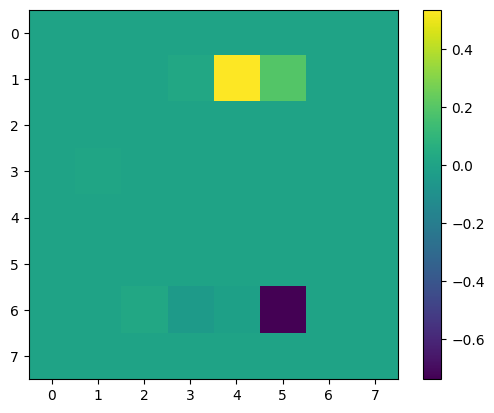

In [11]:
# a = numpy.array([[1,0],
#                  [0,1]])
# print(a)


# print(numpy.exp(a))

# a_ = numpy.exp(a)
# print(numpy.sum(a_))
# a_ = a_/numpy.sum(a_)

# print(a_)

print(numpy.exp(eval_0)/numpy.sum(numpy.exp(eval_0)) - numpy.exp(eval_f)/numpy.sum(numpy.exp(eval_f)))




data = numpy.exp(eval_0)/numpy.sum(numpy.exp(eval_0)) - numpy.exp(eval_f)/numpy.sum(numpy.exp(eval_f))
fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im)
plt.show()

[3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 2.21727617e-08 1.21059177e-06 2.66650582e-02
 5.35582011e-01 1.97029611e-01 3.46534143e-26 3.46534143e-26
 3.46534143e-26 4.45351823e-07 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 9.80952670e-03 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 2.66650582e-02 3.60872320e-03
 3.60872320e-03 1.97029611e-01 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26
 3.46534143e-26 3.46534143e-26 3.46534143e-26 3.46534143e-26]
[6.05213618e-26 6.05213

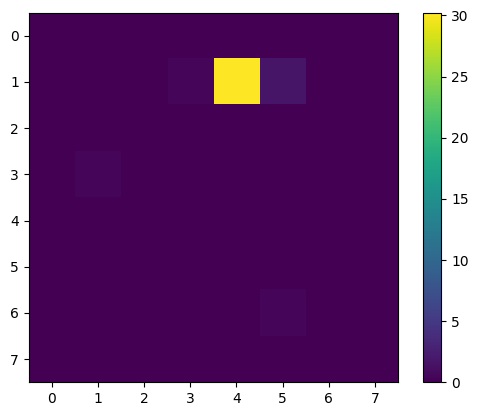

In [12]:



a = numpy.exp(eval_0)/numpy.sum(numpy.exp(eval_0))
a = numpy.reshape(a,64)
print(a)
b = numpy.exp(eval_f)/numpy.sum(numpy.exp(eval_f))
b = numpy.reshape(b,64)
print(b)



print(scipy.special.kl_div(a,b))
c = scipy.special.kl_div(a,b)
c = numpy.reshape(c,(8,8))


data = c
fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im)
plt.show()

[33.35827456 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.35827456 33.35827456 33.3582753  33.35831494 34.27251513
 72.32636035 41.57149474 33.35827456 33.35827456 33.35827456 33.35828942
 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.68879411 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.35827456 34.27249212 33.48008058 33.47918547 52.63547743
 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456 33.35827456
 33.35827456 33.35827456 33.35827456 33.35827456]
64


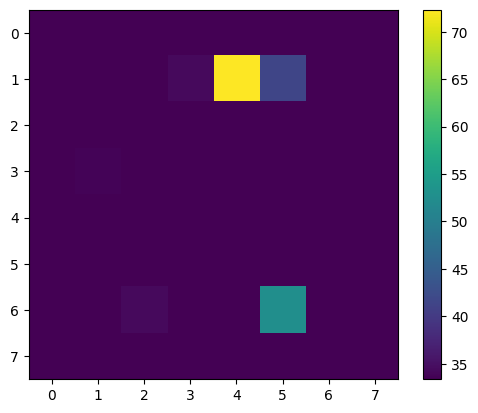

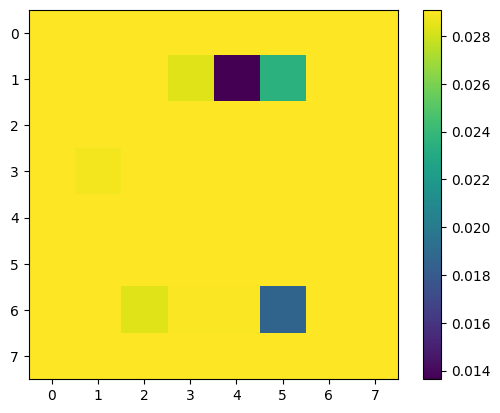

In [13]:
#ある指し手aに対してa以外のexpの総和で各手のQを割って







# a = numpy.exp(eval_0)/numpy.sum(numpy.exp(eval_0))
# b = numpy.exp(eval_f)/numpy.sum(numpy.exp(eval_f))





def Prem(eval):

    eval = numpy.reshape(eval,64)
    #この前にベクトル化しておく

    exp_eval = numpy.exp(eval)

    #Prem: a×a'の次元
    Prem = numpy.ndarray((64,64))
    for i in range(64):
        Prem[i] = exp_eval / (numpy.sum(exp_eval[0:i]) + numpy.sum(exp_eval[i+1:64]))

    return Prem




#Prem(s)[i]とPrem(s|f)[i]のKLDiv




#relavance(eval_0),relavance(eval_f)
#relavance = numpy.ndarray((64,64))

#print(scipy.special.kl_div(Prem(eval_0),Prem(eval_f)))



KLDiv = numpy.ndarray(64)
for j in range(64):
    KLDiv[j] = numpy.sum(scipy.special.kl_div(Prem(eval_0)[j],Prem(eval_f)[j]))

print(KLDiv)

print(numpy.size(KLDiv))



KLDiv = numpy.reshape(KLDiv,(8,8))




data = KLDiv
fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im)
plt.show()





K = numpy.ndarray((8,8))


#for k in range(64):
K = 1/(1+KLDiv)



data = K
fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im)
plt.show()
#関連度K[a] = 1/(1+KLDiv[a])















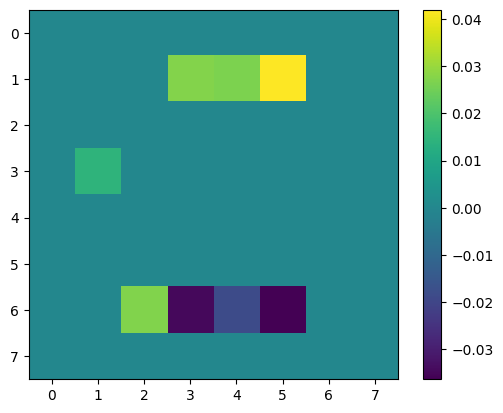

In [14]:
#def contribution():


tokuido = numpy.exp(eval_0)/numpy.sum(numpy.exp(eval_0)) - numpy.exp(eval_f)/numpy.sum(numpy.exp(eval_f))




S = numpy.ndarray((8,8))



S = 2 * K * tokuido / (K + numpy.abs(tokuido))


data = S
fig, ax = plt.subplots()
im = ax.imshow(data)
plt.colorbar(im)
plt.show()


In [15]:
# # MyEgaroucid_for_Console.outの終了

# myegaroucid.stdin.write('quit\n'.encode('utf-8'))
# myegaroucid.stdin.flush()